In [1]:
# Import utility functions
from utils import (
    create_connected_erdos_renyi_graph, 
    is_independent_set,
    violating_edges,
    show_solution
)

# Import algorithms

# Classical algorithms
from algorithms.classical import solve_max_independent_set

# Common components
from algorithms.commons import (
    StatePreparation, 
    CorrelationPreparation, 
    QAOAConfig, 
    OptimizationConfig
)

from algorithms.problems import (
    MaxIndependentSetXMixer,
    MaxIndependentSetBitFlipMixer
)
# QIRO components
from algorithms.qiro import (
    Reducer,
    Simplifier,
    MaxIndependentSetOnePointRule,
    MaxIndependentSetTwoPointsRule,
    QIROSolver
)

# QAOA components
from algorithms.qaoa import QAOASolver

In [2]:
# Create a connected Erdős-Rényi graph
nodes = 12
p = 0.30
seed = 99

G, _ = create_connected_erdos_renyi_graph(n=nodes, p=p, seed=seed)

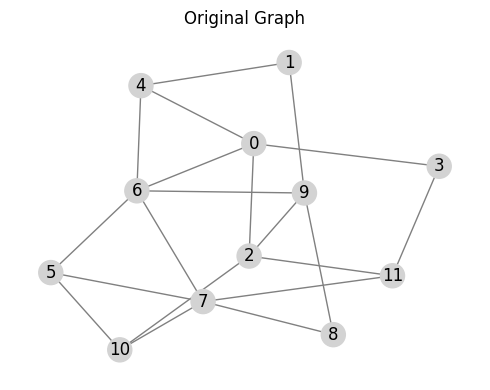

In [3]:
show_solution(G, set(), "Original Graph", legend=False)

In [4]:
# Exact solution using classical algorithm
exact_indep = solve_max_independent_set(G)

In [5]:
print(f"Independent set found by ECOS_BB: {exact_indep}")

print(f"ECOS_BB:  size {len(exact_indep)}, "f"is independent set: {is_independent_set(G, exact_indep)}")
print("Violating edges in ECOS_BB:", violating_edges(G, exact_indep))

Independent set found by ECOS_BB: {1, 2, 3, 6, 8}
ECOS_BB:  size 5, is independent set: True
Violating edges in ECOS_BB: []


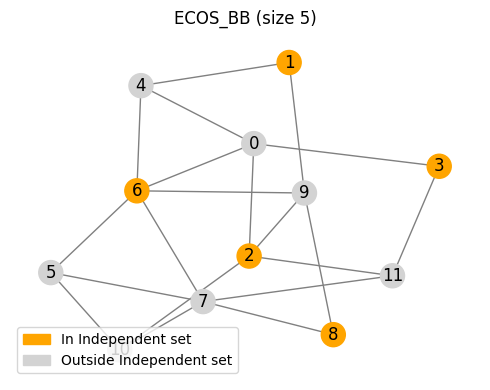

In [6]:
# Visualize results
show_solution(G, exact_indep, f"ECOS_BB (size {len(exact_indep)})", text_orange="In Independent set", text_gray="Outside Independent set")

In [7]:
# Configure and run QAOA solver
state_preparation_qaoa = StatePreparation(
    qaoa_config=QAOAConfig(
        p=4,
        shots=5000,
        device_name="lightning.qubit"
    )
)

# Instantiate QAOA solver
solver = QAOASolver(state_preparation=state_preparation_qaoa)

max_independent_set_problem = MaxIndependentSetBitFlipMixer(graph=G)

# Solve the problem
qaoa_independent_set = solver.solve(max_independent_set_problem)

In [8]:
print(f"Independent set found by QAOA: {qaoa_independent_set}")

print(f"QAOA:  size {len(qaoa_independent_set)}, "f"is independent: {is_independent_set(G, qaoa_independent_set)}")
print("Violating edges by QAOA:", violating_edges(G, qaoa_independent_set))

Independent set found by QAOA: {0, 1, 5, 8, 11}
QAOA:  size 5, is independent: True
Violating edges by QAOA: []


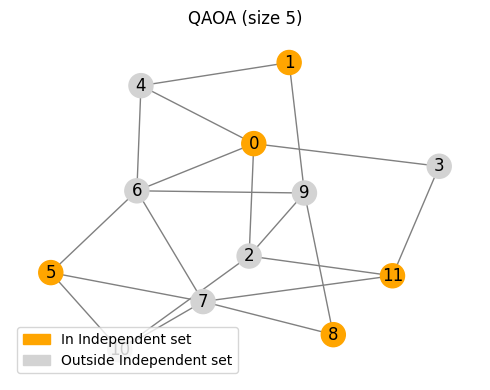

In [9]:
# Visualize results
show_solution(G, qaoa_independent_set, f"QAOA (size {len(qaoa_independent_set)})", text_orange="In Independent set", text_gray="Outside Independent set")

In [10]:
# Configuration for state preparation
state_preparation_config = QAOAConfig(
    p=1,
    device_name="lightning.qubit",
    shots=5000
)

# Configuration for correlation preparation
correlation_config = QAOAConfig(
    p=1,
    device_name="lightning.qubit",
    shots=5000
)

# Optimization configuration
#optimization_config = OptimizationConfig(
#    method="COBYLA",
#    tol=1e-3,
#    options={"maxiter": 100, "disp": True}
#)

# Instantiate state and correlation preparation
state_preparation = StatePreparation(qaoa_config=state_preparation_config)
correlation_preparation = CorrelationPreparation(qaoa_config=correlation_config)

# Instantiate simplifier with vertex cover rules
simplifier = Simplifier(MaxIndependentSetOnePointRule(), MaxIndependentSetTwoPointsRule())

# Instantiate reducer class with problem specific simplification rules
# and state and correlation preparation
reducer = Reducer(
    simplifier=simplifier,
    state_preparation=state_preparation,
    correlation_preparation=correlation_preparation
)

# Instantiate QIRO solver
qiro = QIROSolver(reducer=reducer)

Executing QIROSolver...
Iteration 0

[MIS-3] Node 1 with ⟨Z⟩ = -0.2608 -> added to IS, neighbors [4, 9] removed.
Iteration 1

[MIS-3] Node 8 with ⟨Z⟩ = -0.4880 -> added to IS, neighbors [7] removed.
Iteration 2

[MIS-3] Node 5 with ⟨Z⟩ = -0.2404 -> added to IS, neighbors [6, 10] removed.
Iteration 3

[MIS-3] Node 11 with ⟨Z⟩ = -0.2396 -> added to IS, neighbors [2, 3] removed.
[MIS] Isolated nodes added to IS and removed from the graph: [0]
Solution found: {0, 1, 5, 8, 11}


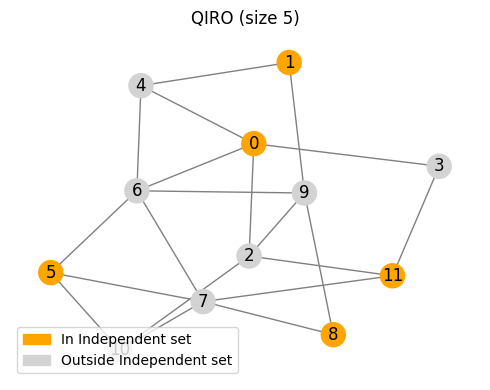

QIRO:  size 5, is independent: True
Violating edges by QIRO: []


In [11]:
print("Executing QIROSolver...")

#qiro_independent_set = qiro.solve(problem=MaxIndependentSetBitFlipMixer(graph=G))
qiro_independent_set = qiro.solve(problem=MaxIndependentSetBitFlipMixer(graph=G))

print(f"Solution found: {qiro_independent_set}")

show_solution(G, qiro_independent_set, f"QIRO (size {len(qiro_independent_set)})", text_orange="In Independent set", text_gray="Outside Independent set")
print(f"QIRO:  size {len(qiro_independent_set)}, "f"is independent: {is_independent_set(G, qiro_independent_set)}")
print("Violating edges by QIRO:", violating_edges(G, qiro_independent_set))